In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [5]:
width = 800
height = 800

Tarea 1. Tablero de ajedrez 800x800

(800, 800, 1)


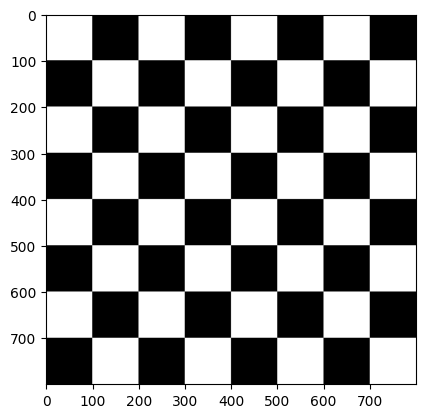

In [8]:
chess_board = np.zeros((width,height,1), dtype = np.uint8)
print(chess_board.shape)

# Tamaño de cada cuadrado
square_size = 100

# Si la suma de la columna y la fila del cuadrado es par se pinta de blanco
for i in range(0, height, square_size):
    for j in range(0, width, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            chess_board[i:i+square_size, j:j+square_size] = 255

cv2.imshow('Image', chess_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board, cmap='gray')
plt.show()

Tarea 2. Crear una imagen estilo Mondrian

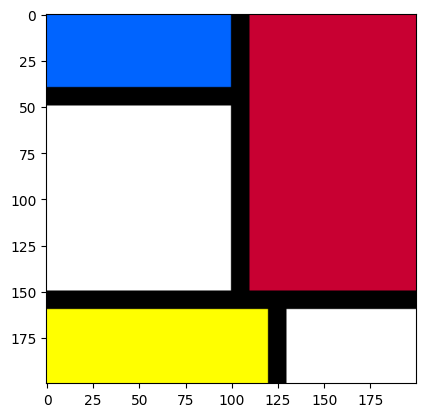

In [10]:
mondrian_image = np.zeros((200, 200,3), dtype = np.uint8)

mondrian_image[0:40,0:100,2] = 255
mondrian_image[0:40,0:100,1] = 100

mondrian_image[:150, 110:, 0] = 200
mondrian_image[:150, 110:, 2] = 50 

mondrian_image[160:, 130:, 0] = 255
mondrian_image[160:, 130:, 1] = 255
mondrian_image[160:, 130:, 2] = 255

mondrian_image[160:, :120, 1] = 255
mondrian_image[160:, :120, 0] = 255

mondrian_image[50:150, 0:100, 0] = 255
mondrian_image[50:150, 0:100, 1] = 255
mondrian_image[50:150, 0:100, 2] = 255

 
plt.imshow(mondrian_image) 
plt.show()

Tarea 3. Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV

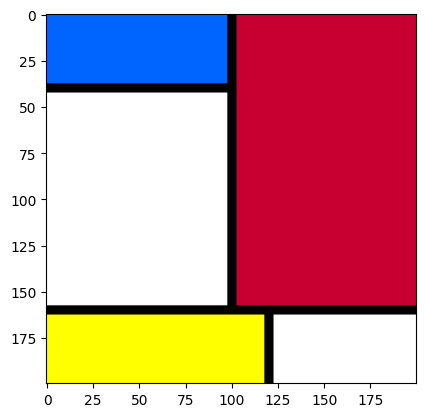

In [12]:
#Imagen realizada por Willy

color_image = np.zeros((200, 200, 3), dtype = np.uint8)

cv2.rectangle(color_image, (0,0), (200,200), (255,255,255), 200)
cv2.rectangle(color_image, (0,0), (100,40), (0,100,255), -1)
cv2.rectangle(color_image, (100,0), (200,160), (200,0,50), -1)
cv2.rectangle(color_image, (0,160), (120,200), (255,255,0), -1)

cv2.line(color_image, (100, 0), (100, 160), (0,0,0), 3)
cv2.line(color_image, (0, 160), (200, 160), (0,0,0), 3)
cv2.line(color_image, (0, 40), (100, 40), (0,0,0), 3)
cv2.line(color_image, (120, 160), (120, 200), (0,0,0), 3)

plt.imshow(color_image)
plt.show()

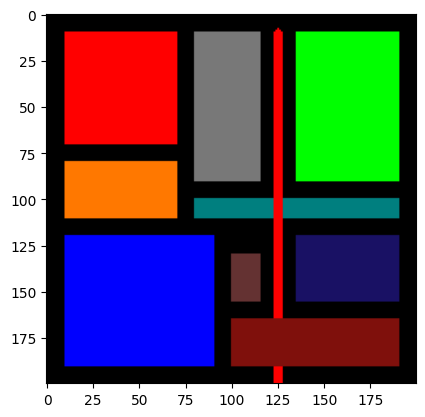

True

In [11]:
# Imagen realizada por Eduardo

#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (70, 70), (255, 0, 0), -1)  #rojo
cv2.rectangle(color_img, (80, 10), (115, 90), (120, 120, 120), -1)  #gris
cv2.rectangle(color_img, (10, 80), (70, 110), (255, 120, 0), -1)  #naranja
cv2.rectangle(color_img, (10, 120), (90, 190), (0, 0, 255), -1)  #azul
cv2.rectangle(color_img, (80, 100), (190, 110), (0, 127, 127), -1) #azul raro
cv2.line(color_img, (125, 10), (125, 200), (255, 0, 0), 3) 
cv2.rectangle(color_img, (135, 10), (190, 90), (0, 255, 0), -1) #verde
cv2.rectangle(color_img, (135, 120), (190, 155), (25, 17, 100), -1)
cv2.rectangle(color_img, (100, 165), (190, 190), (127, 16, 12), -1)
cv2.rectangle(color_img, (100, 130), (115, 155), (100, 50, 50), -1)


plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

Tarea 4. Modifica de alguna forma los valores de un plano de la imagen

Tarea 5. Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [14]:
cam = cv2.VideoCapture(0)

while(True):
    ret, frame = cam.read()

    if ret:
        # Pasamos a escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Hallamos el valor maximo y minimo y su posicion
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)

        # Dibujamos un circulo en esos pixeles
        cv2.circle(frame, min_loc, 10, (200, 100, 255), 2)
        cv2.circle(frame, max_loc, 10, (200, 50, 50), 2)

        cv2.imshow('Vid', frame)

    if cv2.waitKey(20) == 27:
        break

cam.release()
cv2.destroyAllWindows()

Tarea 6. Realizar un popart

In [16]:
popart = cv2.VideoCapture(0)

w = int(popart.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(popart.get(cv2.CAP_PROP_FRAME_HEIGHT))

w = int (w/2)
h = int(h/2)

popart.set(cv2.CAP_PROP_FRAME_WIDTH, w)
popart.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    ret, frame = popart.read()

    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Frame en paleta de grises
        gray_frame = cv2.cvtColor(tl, cv2.COLOR_BGR2GRAY)

        yellow_blue = cv2.merge([255 - r, gray_frame, gray_frame])
        tl[:,:,:] = yellow_blue

        #Captamos los píxeles con un tono más rojo para jugar con él
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(tl, lower_red, upper_red)
        
        tr[:,:,0] = 255 - b
        tr[:,:,1] = r
        tr[:,:,2] = mask
        
        #Dilatación de la imagen
        kernel = np.ones((5, 5), np.uint8)
        tr[:,:,:] = cv2.dilate(tr[:, :, :], kernel, iterations=2)

        #BottomLeft: Efecto sharp
        blurred_frame = cv2.GaussianBlur(frame, (3, 3), 0)
        high_pass_frame = frame - blurred_frame
        bl[:,:] = cv2.addWeighted(frame, 2.5, high_pass_frame, -1.5, 0)
        
        #BottomRight: Duotono negro y verde
        br[:, :] = (0, 0, 0)
        br[gray_frame > 128] = (0, 255, 0)

        #Imagen pixelada
        block_size = 4
        height, width, _ = collage.shape
        small_frame = cv2.resize(collage, (width // block_size, height // block_size), interpolation=cv2.INTER_LINEAR)
        pixelated_frame = cv2.resize(small_frame, (width, height), interpolation=cv2.INTER_NEAREST)        

        
        cv2.imshow('Cam', pixelated_frame)

    if cv2.waitKey(20) == 27:
        break

popart.release()
cv2.destroyAllWindows()